In [ ]:
import requests
import json
import pandas as pd
from retorno_api import Country

In [ ]:
countr = Country()

In [ ]:
__url_by_country = "https://api.covid19api.com/total/country/{0}"
__payload = {}
__headers= {}
__countries = list(countr.retorna_dataframe()["Country"])

In [ ]:
len(__countries)

In [ ]:
country_data = {}
country_ok = []
def dados_raw():
    for country in range(len(__countries)):
        if requests.get(__url_by_country.format(__countries[country])).status_code == 200:
            country_data[__countries[country]] = requests.request("GET", __url_by_country.format(__countries[country]), headers=__headers, data = __payload)
            country_ok.append(__countries[country])
    return country_data

In [ ]:
raw = dados_raw()

In [ ]:
data_by_country = {}
for country in country_ok:
    data_by_country[country] = raw[country].json()

In [ ]:
data_by_country.keys()

In [ ]:
len(data_by_country["Brazil"])

In [ ]:
data_by_country["Brazil"][120]

In [ ]:
Country = []
CountryCode = []
Province = []
City = []
CityCode = []
Lat = []
Lon = []
Confirmed = []
Deaths = []
Recovered = []
Active = []
Date = []
for country in country_ok:
    for pais in range(len(data_by_country[country])):
        Country.append(data_by_country[country][pais]['Country'])
        CountryCode.append(data_by_country[country][pais]['CountryCode'])
        Province.append(data_by_country[country][pais]['Province'])
        City.append(data_by_country[country][pais]['City'])
        CityCode.append(data_by_country[country][pais]['CityCode'])
        Lat.append(data_by_country[country][pais]['Lat'])
        Lon.append(data_by_country[country][pais]['Lon'])
        Confirmed.append(data_by_country[country][pais]['Confirmed'])
        Deaths.append(data_by_country[country][pais]['Deaths'])
        Recovered.append(data_by_country[country][pais]['Recovered'])
        Active.append(data_by_country[country][pais]['Active'])
        Date.append(data_by_country[country][pais]['Date'])

In [ ]:
df = pd.DataFrame()
df["Country"] = pd.Series(Country)
df["CountryCode"] = pd.Series(CountryCode)
df["Province"] = pd.Series(Province)
df["City"] = pd.Series(City)
df["CityCode"] = pd.Series(CityCode)
df["Lat"] = pd.Series(Lat)
df["Lon"] = pd.Series(Lon)
df["Confirmed"] = pd.Series(Confirmed)
df["Deaths"] = pd.Series(Deaths)
df["Recovered"] = pd.Series(Recovered)
df["Active"] = pd.Series(Active)
df["Date"] = pd.Series(Date, dtype='datetime64[ns]')

In [ ]:
df.to_csv(r'backup_csv/by_country.csv')

In [ ]:
df[df["Country"] == "Brazil"].head(7)

In [ ]:
df[df["Country"] == "Brazil"].tail(7)

In [ ]:
df.info()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_brazil = df[df["Country"] == "Brazil"]

In [ ]:
plt.figure(figsize=(21, 8))
plt.bar(x=df_brazil["Date"], height=df_brazil["Deaths"] )
plt.scatter(x=df_brazil["Date"], y=df_brazil["Deaths"])

In [1]:
from retorno_api import By_Country

In [2]:
by_country = By_Country()

In [7]:
df = by_country.retorna_dataframe()

In [8]:
df_Brazil = df[df["Country"] == "Brazil"]

In [9]:
df_Brazil.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
82011,Brazil,,,,,0,0,0,0,0,0,2020-01-22
82201,Brazil,,,,,0,0,0,0,0,0,2020-01-23
82391,Brazil,,,,,0,0,0,0,0,0,2020-01-24
82581,Brazil,,,,,0,0,0,0,0,0,2020-01-25
82771,Brazil,,,,,0,0,0,0,0,0,2020-01-26


In [10]:
df_Brazil.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
162323,Brazil,,,,,0,0,10793732,260970,9605870,926892,2021-03-04
162324,Brazil,,,,,0,0,10869227,262770,9647550,958907,2021-03-05
162325,Brazil,,,,,0,0,10938836,264325,9686024,988487,2021-03-06
162326,Brazil,,,,,0,0,11019344,265411,9739464,10753933,2021-03-07
162327,Brazil,,,,,0,0,11051665,266398,9826292,958975,2021-03-08


In [11]:
import matplotlib.pyplot as plt 

%matplotlib inline

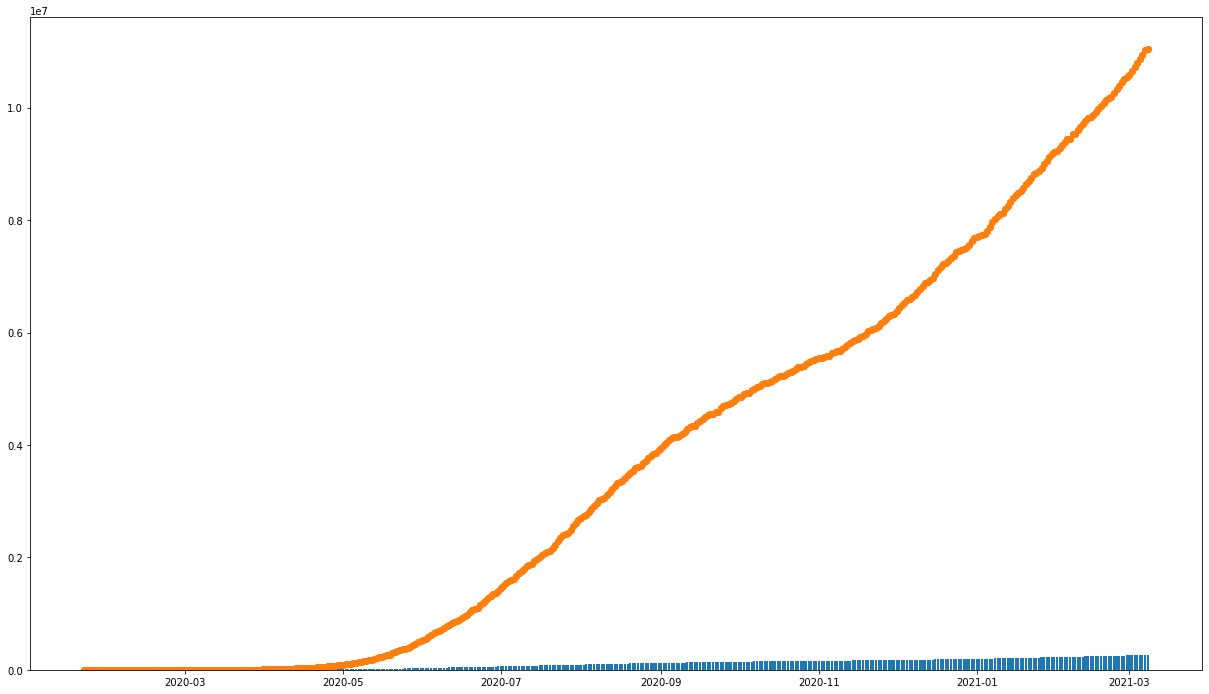

In [12]:
plt.figure(figsize=(21, 12))
plt.bar(x=df_Brazil["Date"], height=df_Brazil["Deaths"])
plt.scatter(x=df_Brazil["Date"], y=df_Brazil["Confirmed"])